# Context:
The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 
cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars 
would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Here let's apply Hierarchial Clustering

### Import libraries and Read the dataset using function .dropna() - to avoid dealing with NAs

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('vehicle-1.csv').dropna()

In [3]:
df.shape

(813, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [11]:
# No missing Values
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
df.describe().transpose()
#Qn - Anything reqd or run Clustering directly? - Scaling

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### Print/ Plot the dependent (categorical variable) and Check for any missing values in the data

In [8]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

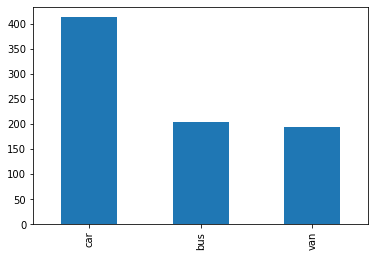

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(df["class"]).plot(kind="bar")
# Data Augmentation to level classes to avoid imbalance

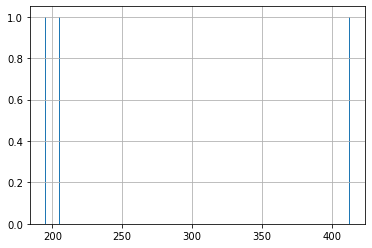

In [15]:
pd.value_counts(df['class']).hist(bins=300)

### KDE plot for all the features to see how many of it can show separate clusters.

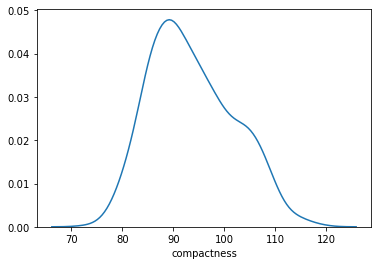

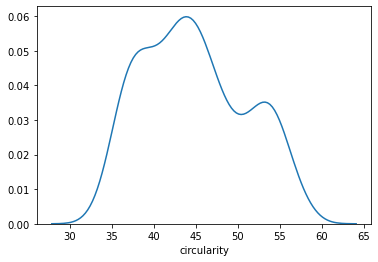

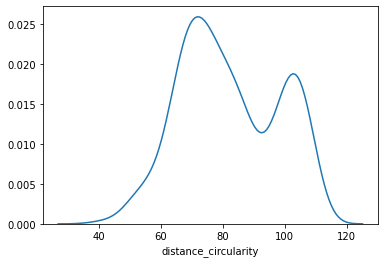

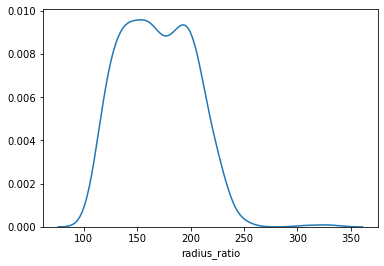

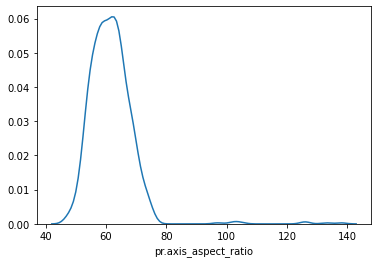

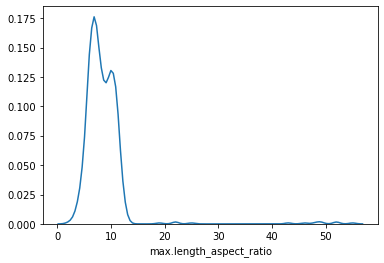

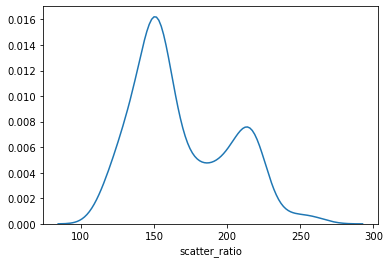

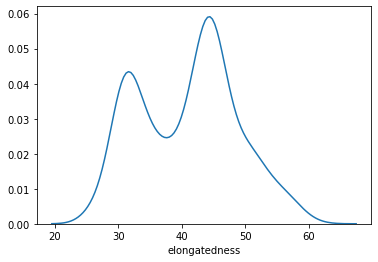

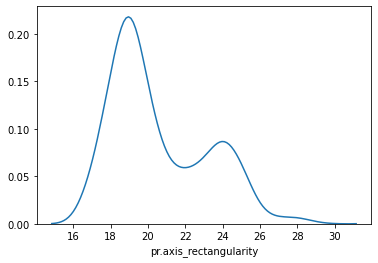

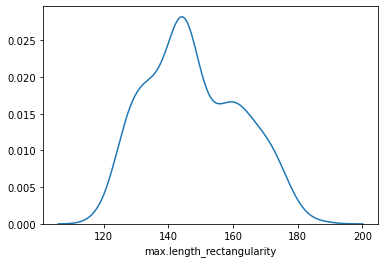

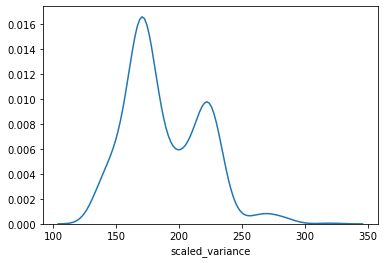

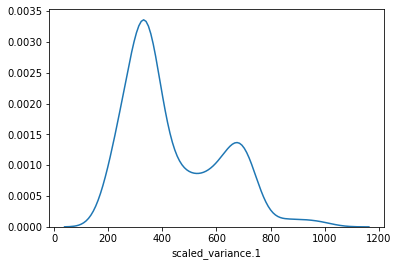

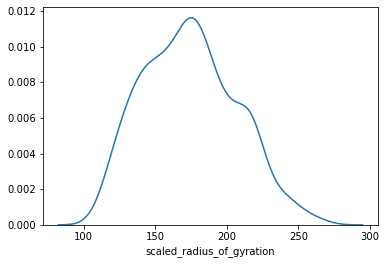

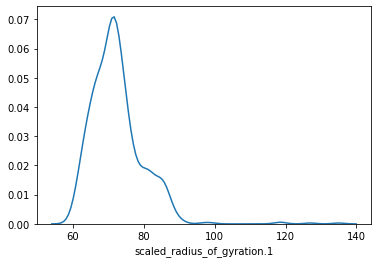

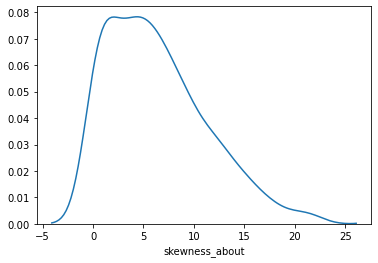

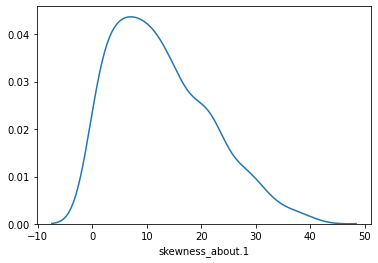

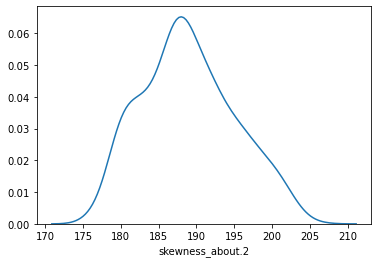

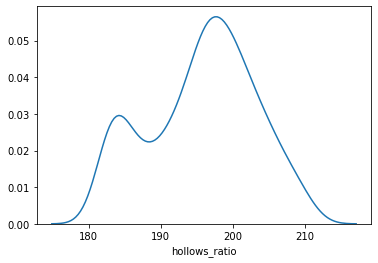

In [16]:
import seaborn as sns

for i in df.columns[df.columns!='class']:
    sns.distplot(df[i],hist=False,)
    plt.show()
# distance_cicularity - Observe 2 - 3 clusters 


### Standardize the data

In [17]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
#go for any clustering methods. You can use zscore function to do this

In [18]:
interest_df = df.drop('class', axis=1)

In [19]:
#method 1
from scipy.stats import zscore
interest_df_z = interest_df.apply(zscore)

In [20]:
interest_df_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  
0         -0.321809       0.171837  
1          0.003400       0.442318  
2         -0.159204       0.036596  
3          1.629444       1.524243  
4         -1.460039      -1.721531

In [21]:
# or
# method 2
# you could use any
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(interest_df),columns=interest_df.columns)
# Qn - Normalizer - Standardize = (x - mean) / std dev , Normalize = (x - mean) / range

In [22]:
X_std.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014                  -0.337462   
2      -1.152637                0.949438                   0.697326   
3       0.642562               -0.606014                  -0.337462   
4       0.514333               -0.606014                  -0.268476   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.397397          -0.339014                   0.301676   
1        -0.590034          -0.618754                  -0.502972   
2         1.111591           1.122486                   1.415804   
3        -0.911095          -0.738643                  -1.462359   
4         1.689501          -0.647299                   0.425468   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321192       -0.071523          0.371287   
1                    -0.053505        0.538425          0.147109   
2                     0.080339        1.555006         -0.413338   
3                    -1.258099       -0.071523         -0.301249   
4                     7.307905        0.538425         -0.189159   

   skewness_about.2  hollows_ratio  
0         -0.321809       0.171837  
1          0.003400       0.442318  
2         -0.159204       0.036596  
3          1.629444       1.524243  
4         -1.460039      -1.721531

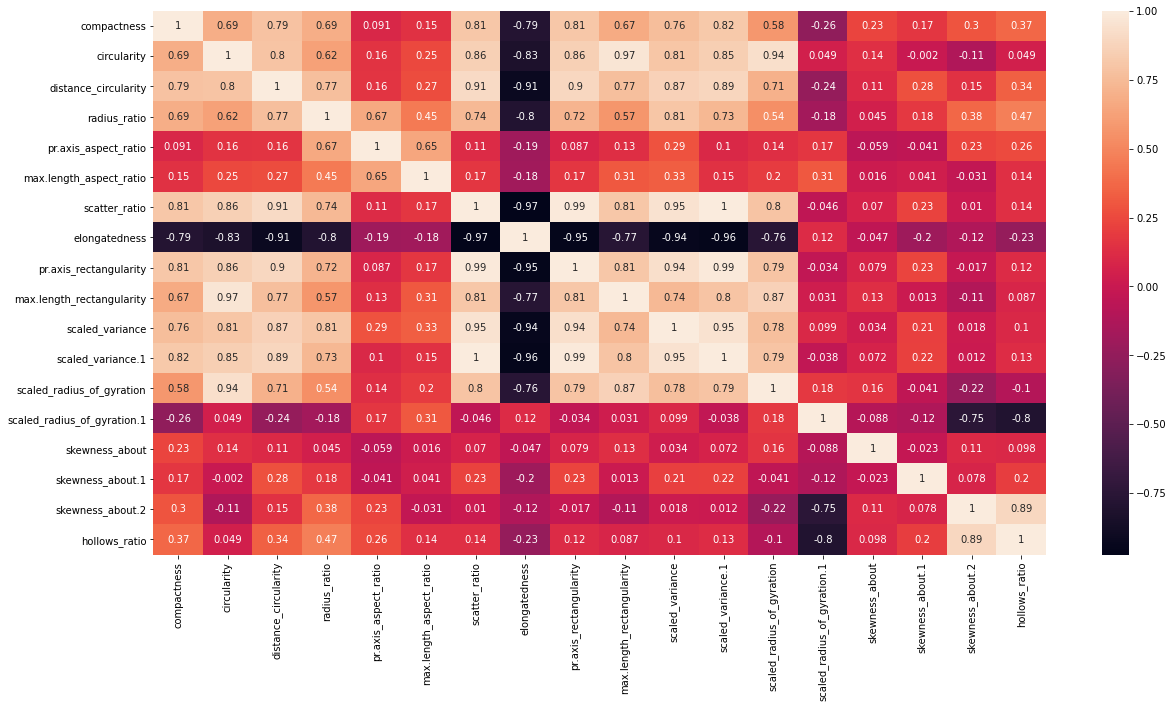

In [23]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(X_std.corr(),annot=True)
plt.show()
# Data Pts correlated to each other, Issue - If remove, then euclidian distance across points changes in 
# higher to lower D space, Not a big impact overall 

### Find out the linkage matrix

In [24]:
#Use ward as linkage metric and distance as Eucledian

In [25]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_std, 'ward', metric='euclidean')
Z.shape
# Different Methods 
# Outliers impact Min and Complete method, Avg(pairwise distances) or Centroid works better
# Ward - look at WSS - minimize WSS as combine. 

(812, 4)

In [26]:
Z[0:20].astype(int)
# Points in cluster, distance, # of pts in cluster

array([[127, 370,   0,   2],
       [478, 752,   0,   2],
       [448, 525,   0,   2],
       [ 99, 383,   0,   2],
       [187, 222,   0,   2],
       [393, 645,   0,   2],
       [ 91, 461,   0,   2],
       [557, 732,   0,   2],
       [206, 354,   0,   2],
       [307, 535,   0,   2],
       [132, 215,   0,   2],
       [604, 781,   0,   2],
       [218, 578,   0,   2],
       [  1,  11,   0,   2],
       [184, 246,   0,   2],
       [346, 466,   0,   2],
       [297, 547,   0,   2],
       [ 22, 191,   0,   2],
       [537, 784,   0,   2],
       [351, 750,   0,   2]])

In [27]:
Z[800:].astype(int) 
# 1595 - Pt itself a cluster here

array([[1595, 1605,   16,  123],
       [1606, 1608,   17,  118],
       [1603, 1609,   18,  156],
       [1599, 1604,   20,  117],
       [1602, 1611,   21,  173],
       [1585, 1615,   25,  178],
       [1613, 1616,   26,  240],
       [1614, 1619,   30,  358],
       [1612, 1618,   32,  274],
       [1601, 1621,   51,  282],
       [1617, 1620,   53,  531],
       [1622, 1623,  107,  813]])

### Plot the dendrogram for the consolidated dataframe

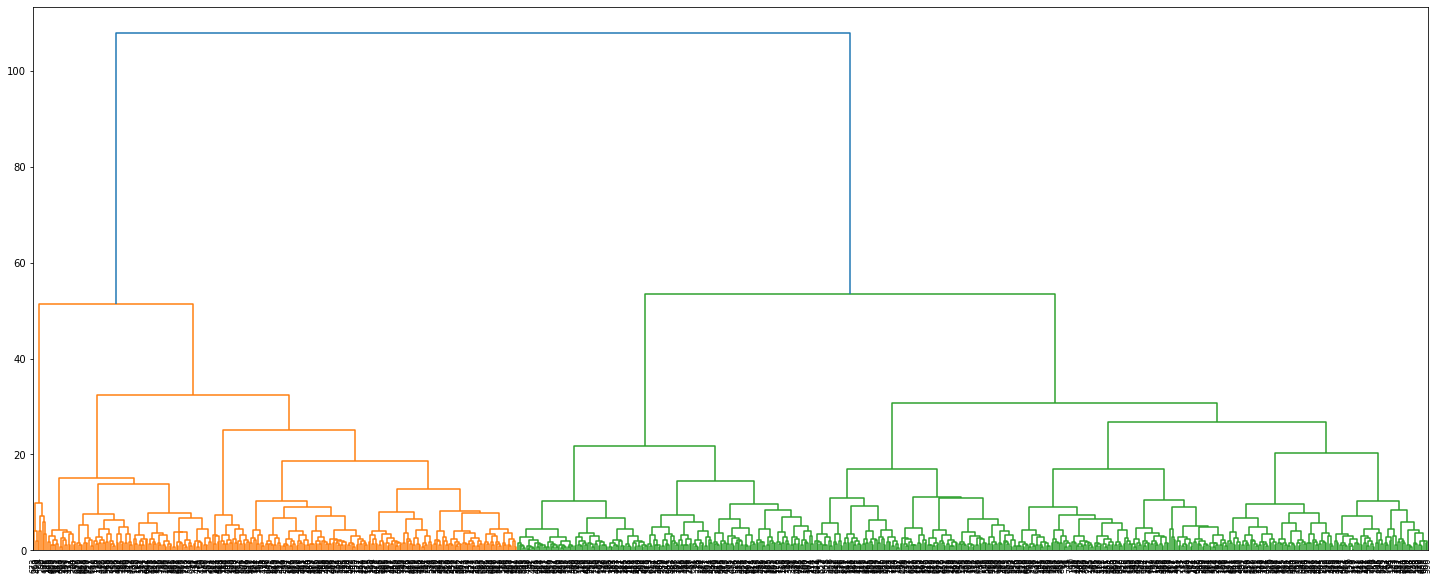

In [28]:
plt.figure(figsize=(25, 10))
dendrogram(Z,
           leaf_rotation=90.,  # rotates the x axis labels
           leaf_font_size=8.)
plt.show()


In [29]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# Calculate Cophenetic Coefficient
c, coph_dists = cophenet(Z , pdist(X_std))

c
# Higher value the better, It is used to compare dendograms

0.6296533478726706

In [30]:
# Different values for Metric and Distance and calculate Cophenetic Coefficient
Z1 = linkage(X_std, method = 'average', metric='mahalanobis')
Z1.shape
c, coph_dists = cophenet(Z1 , pdist(X_std))

c

0.6128181184315725

Recreate the dendrogram for last 12 merged clusters

### From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

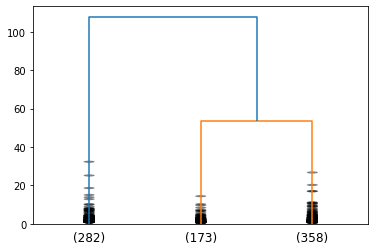

In [31]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
    show_leaf_counts=True,
    show_contracted = True
)
plt.show()

In [32]:
max_d = 52
# Get distance where creating clusters, 3 Clusters

Text(0, 0.5, 'Distance')

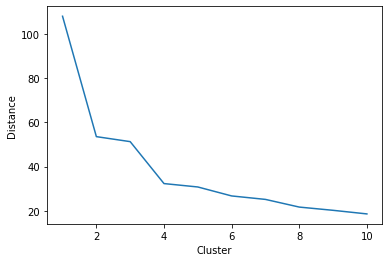

In [47]:
# Elbow Method to figure out Number of Clusters based on distance measure
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)
plt.xlabel('Cluster')
plt.ylabel('Distance')
# Use Biz Context plus elbow method combined to figure out ideal # of clusters

In [49]:
Z[-10:, 2]

array([ 18.62610531,  20.24981388,  21.71540388,  25.17943954,
        26.74594593,  30.79453091,  32.32903331,  51.27388773,
        53.53280707, 107.91013184])

### Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [53]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters
# Flat Clustering. 

array([3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 3, 2, 3, 3, 1,
       3, 2, 1, 1, 2, 3, 3, 3, 1, 3, 2, 1, 1, 2, 1, 2, 3, 3, 1, 3, 3, 2,
       3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 3, 1, 1,
       3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1,
       2, 2, 1, 2, 1, 3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 2, 2, 3, 3, 1, 1, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 1,
       2, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 2, 1, 3, 3, 1, 1,
       3, 1, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 3, 3, 1, 3, 2, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 3, 3,
       1, 3, 2, 1, 3, 3, 1, 3, 2, 2, 3, 1, 3, 1, 2, 2, 2, 2, 1, 3, 3, 3,
       1, 2, 3, 3, 2, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 1, 2,
       3, 3, 3, 1, 2, 3, 3, 2, 2, 1, 3, 1, 3, 2, 2, 1, 3, 1, 2, 2, 1, 3,
       3, 1, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 3, 1, 2, 2, 3, 1, 2, 1, 1, 2, 1, 3, 2,

In [54]:
# Same as above by providing # of Clusters
k=3
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 3, 2, 3, 3, 1,
       3, 2, 1, 1, 2, 3, 3, 3, 1, 3, 2, 1, 1, 2, 1, 2, 3, 3, 1, 3, 3, 2,
       3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 3, 1, 1,
       3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1,
       2, 2, 1, 2, 1, 3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 2, 2, 3, 3, 1, 1, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 1,
       2, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 2, 1, 3, 3, 1, 1,
       3, 1, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 3, 3, 1, 3, 2, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 3, 3,
       1, 3, 2, 1, 3, 3, 1, 3, 2, 2, 3, 1, 3, 1, 2, 2, 2, 2, 1, 3, 3, 3,
       1, 2, 3, 3, 2, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 1, 2,
       3, 3, 3, 1, 2, 3, 3, 2, 2, 1, 3, 1, 3, 2, 2, 1, 3, 1, 2, 2, 1, 3,
       3, 1, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 3, 1, 2, 2, 3, 1, 2, 1, 1, 2, 1, 3, 2,

In [55]:
clusters[:15]

array([3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2], dtype=int32)

In [56]:
df['class'][:15]

0     van
1     van
2     car
3     van
4     bus
6     bus
7     van
8     van
10    van
11    car
12    bus
13    van
14    bus
15    car
16    van
Name: class, dtype: object

In [57]:
# Accuracy of clusters
sum(clusters==df['class'].map({'van':3,'car':1,'bus':2}).values)/len(clusters)
# By random, 33% 

0.5522755227552275

In [58]:
df["cluster"] = clusters

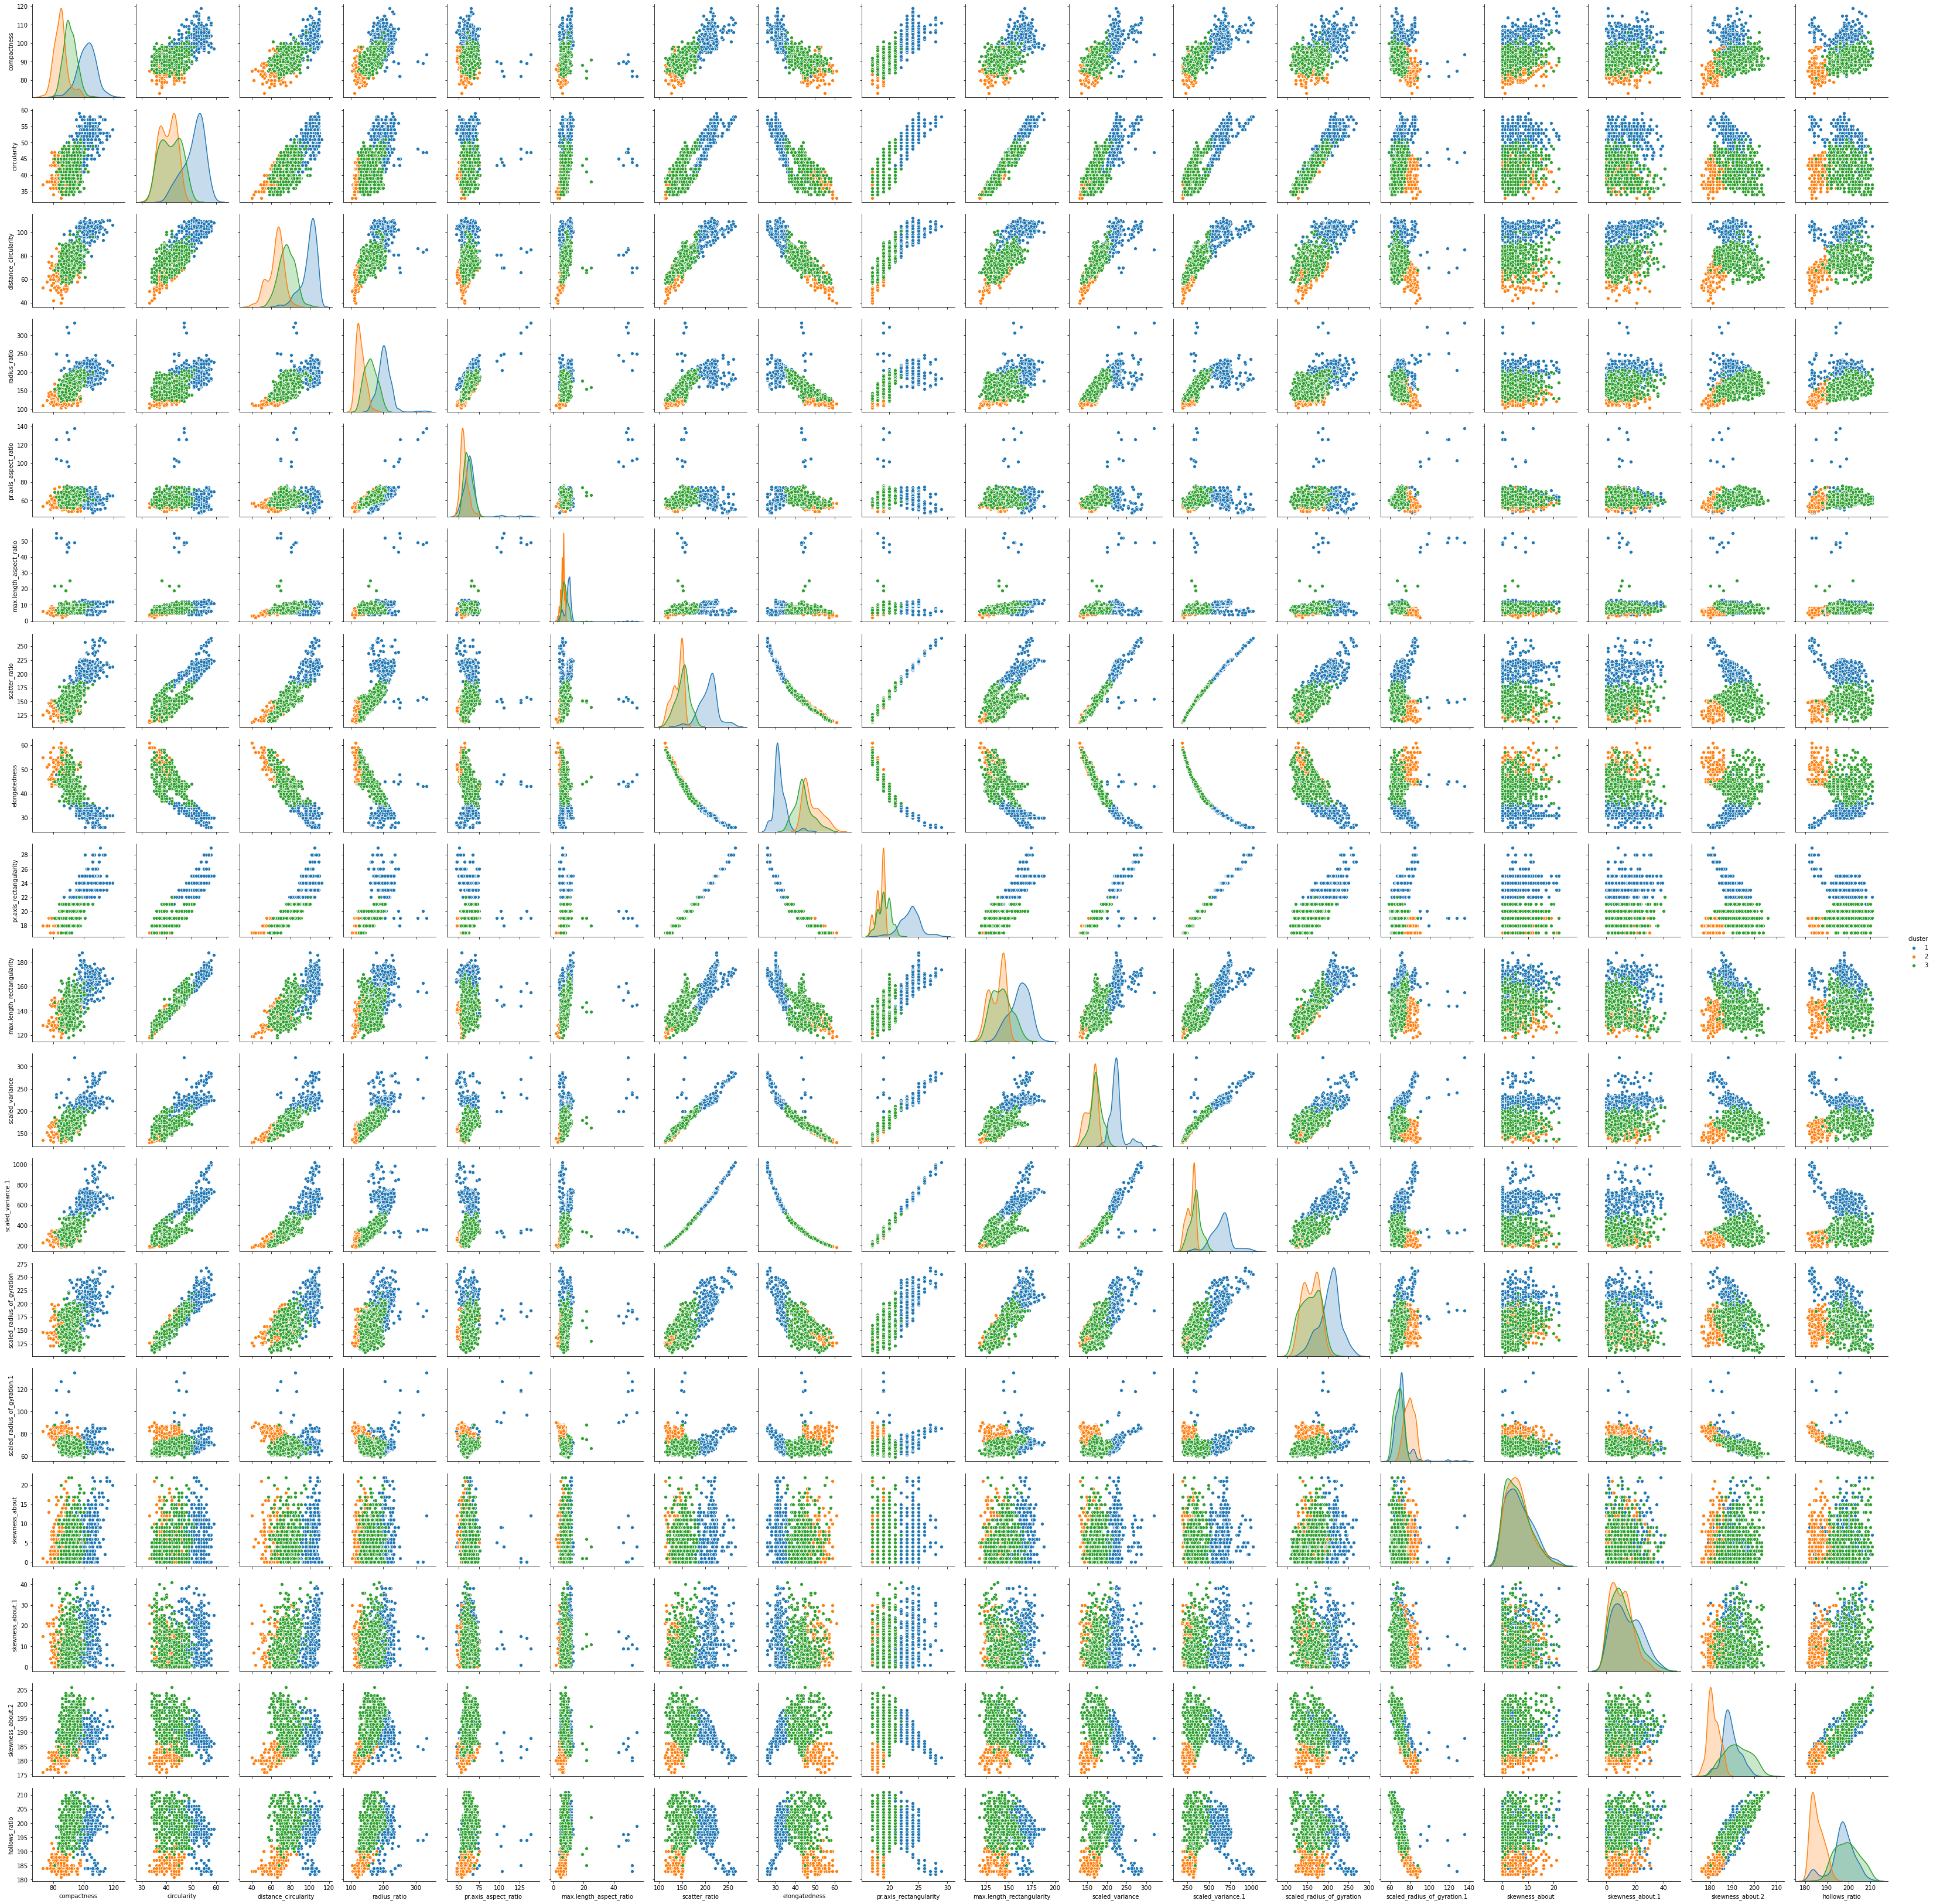

In [59]:
# One way of depicting Clusters, Also use Box Plots for Biz Interpretation
sns.pairplot(df, hue="cluster")

#### Alternate Way of Visualizing Clusters

In [60]:
from sklearn.decomposition import PCA
# Calculate Principal Component Analysis
pca = PCA(n_components=2)
pca.fit(X_std)
# 2 Principal Components for 2 D Visualion

PCA(n_components=2)

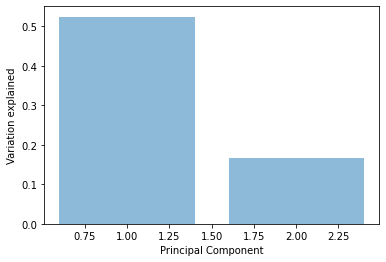

In [62]:
plt.bar(list(range(1,3)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Principal Component')
plt.show()
# First 2 PC explain around 65% variation

In [111]:
# Transform X to PC1 & PC2
X_std_pca2 = pca.transform(X_std)

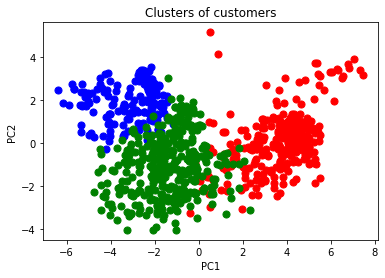

In [129]:
# Visualising the clusters
plt.scatter(X_std_pca2[clusters == 1, 0], X_std_pca2[clusters == 1, 1], s = 50, c = 'red')
plt.scatter(X_std_pca2[clusters == 2, 0], X_std_pca2[clusters == 2, 1], s = 50, c = 'blue')
plt.scatter(X_std_pca2[clusters == 3, 0], X_std_pca2[clusters == 3, 1], s = 50, c = 'green')
plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# See some seperation based on Clustering used

In [90]:
# Calculate Avg Silhoutte Score
from sklearn.metrics import silhouette_score
silhouette_score(X_std,clusters)

0.2634332134378479

Silhouette Score is better when closer 1 and worse when closer to -1

here, it is not so great.

### Final dendogram with 'ward linkage'

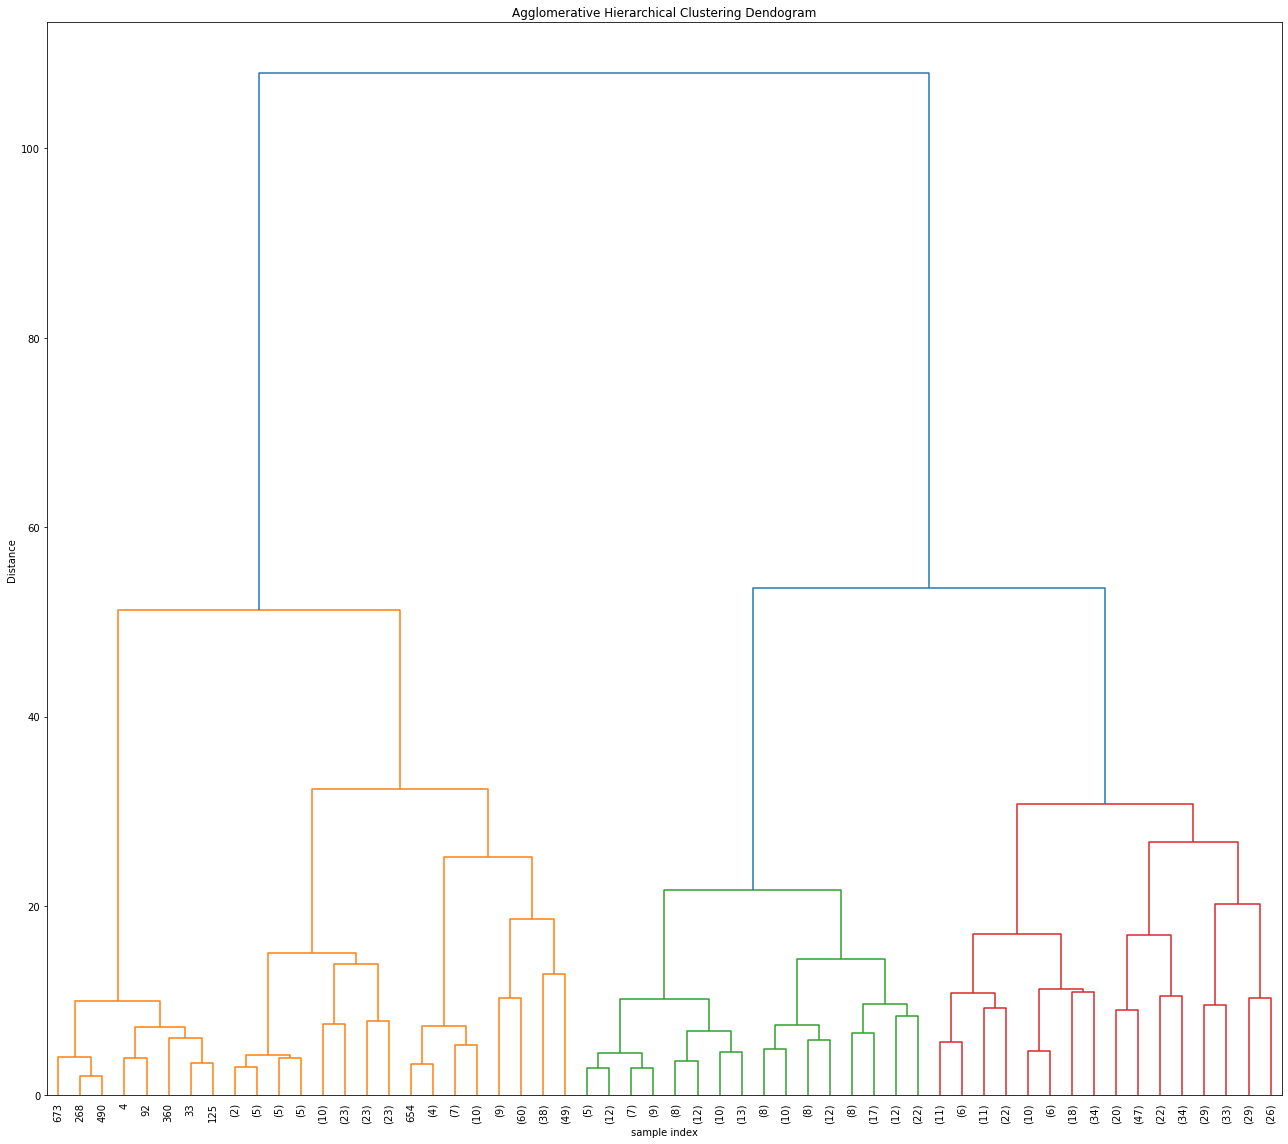

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_std, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()
# () - Number of data points in the cluster as the cluster was truncated, else it provides the index of the data point

In [ ]:
# Conclusion
# Hierarchial dataset & break car groups into smaller subgroubs based on features & Business Context.